<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-AI_programming/week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3
# Transpose & Permute



In [ ]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
for c in [np, torch, tf]:
  print(c.__name__, c.__version__)

numpy 1.25.2
torch 2.2.1+cu121
tensorflow 2.15.0


## Transpose
- 전치 행렬. 행과 열을 바꾸는 처리.
- Tensor의 경우 여러 축을 가지는데, 이것 중 2개 축의 위치를 바꾼다.
<hr>
- numpy/pytorch: axis만 변경됐을 뿐 여전히 같은 데이터를 공유하므로 새로운 tensor에서 데이터를 변경할 경우 원래의 tensor도 데이터가 반영된다.
- tensorflow: tensor가 immutable이므로 transpose하면 다른 tensor가 생성되므로 영향을 미치지 않음.

### NumPy

In [ ]:
a = np.random.rand(2, 3)
t1 = np.transpose(a)
t2 = a.T
print(a.shape)
print(t1.shape)
print(t2.shape)

t2[0,1] = 77
print(a[1,0])
print(t1[0,1])
print(t2[0,1])

(2, 3)
(3, 2)
(3, 2)
77.0
77.0
77.0


### PyTorch

In [ ]:
a_torch = torch.rand(2, 3)
t1_torch = torch.transpose(a_torch, 0, 1) #axis-0 (행) 과 axis-1 (열)을 교체.
t2_torch = a_torch.T
print(a_torch.shape)  #torch.Size([2,3])
print(t1_torch.shape) #torch.Size([3,2])
print(t2_torch.shape) #torch.Size([3,2])

t2_torch[0,1] = 77
print(a_torch[1,0])  # tensor(77.)
print(t1_torch[0,1]) # tensor(77.)
print(t2_torch[0,1]) # tensor(77.)

torch.Size([2, 3])
torch.Size([3, 2])
torch.Size([3, 2])
tensor(77.)
tensor(77.)
tensor(77.)


### TensorFlow

In [ ]:
a_tf = tf.random.normal([2, 3])
t1_tf = tf.transpose(a_tf)
t2_tf = tf.transpose(a_tf, perm=[1, 0]) # T 지원안함.
print(a_tf.shape, a_tf.dtype)
print(t1_tf.shape, t1_tf.dtype)
print(t2_tf.shape, t2_tf.dtype)

indices = tf.constant([[0, 1]]) # (2, 2) 위치를 변경하고자 함
updates = tf.constant([77], dtype=tf.float32) # 해당 위치에 넣고 싶은 값
t2_tf = tf.tensor_scatter_nd_update(t2_tf, indices, updates)
print(a_tf[1,0])
print(t1_tf[0,1])
print(t2_tf[0,1])

(2, 3) <dtype: 'float32'>
(3, 2) <dtype: 'float32'>
(3, 2) <dtype: 'float32'>
tf.Tensor(0.43915224, shape=(), dtype=float32)
tf.Tensor(0.43915224, shape=(), dtype=float32)
tf.Tensor(77.0, shape=(), dtype=float32)


## Permute
- tensor 축들의 순서를 임의로 바꿈
- transpose와 달리 임의의 수의 축들을 임의의 순서로 자유롭게 변경 가능.
- numpy, tensorflow는 transpose 통해 permute 구현.

### NumPy

In [ ]:
a = np.random.rand(2, 3, 4)
t1 = np.transpose(a, (0, 2, 1)) # 기존의 axis 0,1,2 순서를 axis 0,2,1 순서로 변경.
print(a.shape)  # (2,3,4)
print(t1.shape) # (2,4,3)
t1[0,1,2] = 77
print(a[0,2,1])  # 77.0
print(t1[0,1,2]) # 77.0

(2, 3, 4)
(2, 4, 3)
77.0
77.0


### PyTorch

In [ ]:
a_torch = torch.rand(2, 3, 4)
t1_torch = torch.permute(a_torch, (0, 2, 1)) # numpy의 transpose와 사용방법이 유사.
print(a_torch.shape)  # torch.Size([2, 3, 4])
print(t1_torch.shape) # torch.Size([2, 4, 3])
t1_torch[0,1,2] = 77
print(a_torch[0,2,1])  # tensor(77.)
print(t1_torch[0,1,2]) # tensor(77.)

torch.Size([2, 3, 4])
torch.Size([2, 4, 3])
tensor(77.)
tensor(77.)


### TensorFlow

In [ ]:
a_tf = tf.random.normal([2, 3, 4])
t1_tf = tf.transpose(a_tf, perm=[0, 2, 1]) #perm 이라는 키워드로 변경될 축의 순서를 기재.
print(a_tf.shape)  # (2, 3, 4)
print(t1_tf.shape) # (2, 4, 3)

(2, 3, 4)
(2, 4, 3)


# Tensor Storage
Tensor 인스턴스의 실제 데이터가 저장되는 1D numerical array 관리
- 여러 인스턴스들이 같은 storage를 공유할 수 있음.
- cpu 또는 gpu 등의 memory의 실제 data가 저장된 contiguous block 관리.
- 다양한 shape의 Tensor 인스턴스들은 자신의 storage 인스턴스를 통해 data block을 관리함.

In [ ]:
import torch

x = torch.randn(3,3)

print(x.storage())

 -0.41986027359962463
 -0.8027663230895996
 -1.3224666118621826
 -0.945031464099884
 -1.1443856954574585
 0.6893463730812073
 -1.1195076704025269
 -0.12586873769760132
 -0.40938544273376465
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]


<ipython-input-42-7a8fb5f03ade>:5: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(x.storage())


- 실제 data가 저장되는 memory를 가리키는 위치를 반환하는 메서드 가짐.

In [ ]:
import torch

a = torch.tensor([range(i,i+3) for i in [0,3,6]])
a_sub = a[1:,0] # 부분에 대한 view

# Tensor a 와 a_sub 의 contiguous 여부 확인.
print(a.is_contiguous(), a_sub.is_contiguous())

# Tensor a 와 a_sub 가 같은 메모리의 데이터를 공유하는지 여부.
print(a.storage().data_ptr() == a_sub.storage().data_ptr())

# Storage 인스턴스는 각 Tensor 인스턴스 별로 생성됨.
print(id(a.storage()) == id(a_sub.storage()))

# Tensor 인스턴스의 meta data
print(f"{a.shape=}, {a.size()=}, {a.stride()=}, {a.storage_offset()=}")
print(f"{a_sub.shape=}, {a_sub.size()=}, {a_sub.stride()=}, {a_sub.storage_offset()=}")

True False
True
True
a.shape=torch.Size([3, 3]), a.size()=torch.Size([3, 3]), a.stride()=(3, 1), a.storage_offset()=0
a_sub.shape=torch.Size([2]), a_sub.size()=torch.Size([2]), a_sub.stride()=(3,), a_sub.storage_offset()=3


- `stride`: 각 축에서 index가 증가할 때 건너뛰어야하는 객체의 수.
- `storage_offset`: 현재 Tensor 인스턴스가 Storage가 관리하는 memory block에서 몇 번째 객체에서 시작하는지를 나타냄.  

## Contiguous 확인

In [ ]:
a = torch.tensor([ range(i,i+3) for i in [0,3,6]])
print(a)
print(a.storage())
print(a.is_contiguous())

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]
True


In [ ]:
a_sub = a[1:,0]
print(a_sub)
print(a_sub.storage())
print(a_sub.is_contiguous())
print(a.storage().data_ptr() == a_sub.storage().data_ptr())

tensor([3, 6])
 0
 1
 2
 3
 4
 5
 6
 7
 8
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]
False
True


## View / Reshape

view: instance가 contiguous한 경우에만 사용 가능.<br>
reshape: <br>
- contiguous한 경우 view와 같은 동작.
- 아닌 경우엔 contiguous() 메서드를 호출하고 view를 수행한 것에 해당함. (이 경우  underlying memory block이 새로 만들어짐.)
- 따라서 memory를 공유할 수도 아닐 수도 있음.


In [ ]:
a_r = a.reshape((9,))
a_r[3] = 777
print('데이터 저장공간을 share함.')
print('a_r: af.reshape')
print(a_r)
print('a: orginal')
print(a)

데이터 저장공간을 share함.
a_r: af.reshape
tensor([  0,   1,   2, 777,   4,   5,   6,   7,   8])
a: orginal
tensor([[  0,   1,   2],
        [777,   4,   5],
        [  6,   7,   8]])


## Transpose / Permute
- underlying data 를 공유하여 Tensor 인스턴스의 meta data (stride 등)을 수정한다.
- 단, 이를 통해 얻어진 인스턴스에서는
contiguous는 깨지게 된다.
- contiguous 메서드 호출을 하여 해당 인스턴스의 meta data를 기반으로 Tensor 인스턴스를 새로 얻는 경우에는 새로운 underlying data가 만들어지게 된다.

In [ ]:
a_t = torch.transpose(a,0,1)
print(a_t)
print(a_t.storage())
print(a_t.is_contiguous())

tensor([[  0, 777,   6],
        [  1,   4,   7],
        [  2,   5,   8]])
 0
 1
 2
 777
 4
 5
 6
 7
 8
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]
False


In [ ]:
a_t[0,1] = 999
print(a_t)
print('-------')
print(a)
print('-------')
print(a_sub)

tensor([[  0, 999,   6],
        [  1,   4,   7],
        [  2,   5,   8]])
-------
tensor([[  0,   1,   2],
        [999,   4,   5],
        [  6,   7,   8]])
-------
tensor([3, 6])


In [ ]:
act = a_t.contiguous()
print(act)
print(act.storage())
act[1] = 999
print(act)
print(a_t)

tensor([[  0, 999,   6],
        [  1,   4,   7],
        [  2,   5,   8]])
 0
 999
 6
 1
 4
 7
 2
 5
 8
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]
tensor([[  0, 999,   6],
        [999, 999, 999],
        [  2,   5,   8]])
tensor([[  0, 999,   6],
        [  1,   4,   7],
        [  2,   5,   8]])


In [ ]:
a_t_r = a_t.reshape((9,)) # uncontiguous tensor에서는 새로 생성이 이루어짐.
print(a_t_r)
a_t_r[1] = 999
print(a_t_r)
print(a_t) # 달라짐.

tensor([  0, 999,   6,   1,   4,   7,   2,   5,   8])
tensor([  0, 999,   6,   1,   4,   7,   2,   5,   8])
tensor([[  0, 999,   6],
        [  1,   4,   7],
        [  2,   5,   8]])


In [ ]:
print(a)
print('------')
print('permute axis-0 and axis-1 = transpose')
ap = a.permute([1,0]) # permute axis-0 and axis-1
print(ap)
print(a.storage().data_ptr() == ap.storage().data_ptr())
print(ap.is_contiguous())

tensor([[  0,   1,   2],
        [999,   4,   5],
        [  6,   7,   8]])
------
permute axis-0 and axis-1 = transpose
tensor([[  0, 999,   6],
        [  1,   4,   7],
        [  2,   5,   8]])
True
False


In [ ]:
print(f"{a.shape=}, {a.size()=}, {a.stride()=}, {a.storage_offset()=}")
print(f"{a_t.shape=}, {a_t.size()=}, {a_t.stride()=}, {a_t.storage_offset()=}")
print(f"{a_sub.shape=}, {a_sub.size()=}, {a_sub.stride()=}, {a_sub.storage_offset()=}")

a.shape=torch.Size([3, 3]), a.size()=torch.Size([3, 3]), a.stride()=(3, 1), a.storage_offset()=0
a_t.shape=torch.Size([3, 3]), a_t.size()=torch.Size([3, 3]), a_t.stride()=(1, 3), a_t.storage_offset()=0
a_sub.shape=torch.Size([2]), a_sub.size()=torch.Size([2]), a_sub.stride()=(3,), a_sub.storage_offset()=3


# view, data, and detach

In [ ]:
def get_tensor_info(tensor):
  info = []
  for name in ['requires_grad', 'is_leaf', 'retains_grad', 'grad_fn', 'grad']:
    info.append(f'{name}({getattr(tensor, name, None)})')
  info.append(f'\ntensor{str(tensor)}')
  return ' '.join(info)

## tensor.view()
**tensor 인스턴스의 dimension 수정에 사용.**
- 원본 tensor 인스턴스 데이터가 contiguous해야 함.
- 이 메서드는 새로운 shape를 가진 같은 데이터의 새로운 tensor 인스턴스를 반환하지만, 원본 tensor 인스턴스와 underlying memory를 공유하여 같은 데이터를 공유함.
- 즉, 메모리를 재할당하지 않고 tensor의 shape와 각 축의 stride만이 바뀜.

In [ ]:
# requires_grad=True는 이 텐서에 대한 연산을 추적해야 함을 의미
a = torch.rand(12,requires_grad=True)
print(f'{a.shape=}, {a.data_ptr()=}, \n{a.is_contiguous()=}, {a.stride()=}\n')

a_view = a.view((2,3,2))
print(f'a_view: {a_view.shape=}, {a_view.data_ptr()=}, \n{a_view.is_contiguous()=}, {a_view.stride()=}\n')

a_view_t = a_view.transpose(0,1)
print(f'a_view_t: {a_view_t.shape=}, {a_view_t.data_ptr()=}, \n{a_view_t.is_contiguous()=}, {a_view_t.stride()=}\n')

a_other = a_view_t.contiguous()
print(f'a_other: {a_other.shape=}, {a_other.data_ptr()=}, \n{a_other.is_contiguous()=}, {a_other.stride()=}')


a.shape=torch.Size([12]), a.data_ptr()=97289610544384, 
a.is_contiguous()=True, a.stride()=(1,)

a_view: a_view.shape=torch.Size([2, 3, 2]), a_view.data_ptr()=97289610544384, 
a_view.is_contiguous()=True, a_view.stride()=(6, 2, 1)

a_view_t: a_view_t.shape=torch.Size([3, 2, 2]), a_view_t.data_ptr()=97289610544384, 
a_view_t.is_contiguous()=False, a_view_t.stride()=(2, 6, 1)

a_other: a_other.shape=torch.Size([3, 2, 2]), a_other.data_ptr()=97289575683712, 
a_other.is_contiguous()=True, a_other.stride()=(4, 2, 1)


## tensor.data
**tensor 인스턴스의 데이터를 의미하는 attribute.**<br>
tensor 인스턴스의 grad와 requires_grad와 같은 tensor의 메타데이터를 가지고 있지 않은 순수한 데이터를 의미.
- 주로 autograd에서 미분 계산을 하지 않고 원본 데이터를 직접 조작할 때 사용.
- 현재 tensor.data를 직접 접근하는 방식은 권장되지 않음.


## tensor.detach
- .detach()를 사용하여 계산 그래프에서 해당 텐서를 분리하면 gradient 계산에서 제외되나 여전히 데이터는 공유함.
- tensor.data를 직접 수정할 경우, 계산 그래프의 무결성이 깨질 수 있으며 이는 예상치 못한 버그의 원인이 됨.

직접적인 데이터 조작이 필요할 때는 계산 그래프에서 해당 텐선 인스턴스를 분리하는 .detach() 사용 권장

In [ ]:
b = a*2.        #
b.retain_grad() # leaf tensor가 아닌데도 grad를 확인하기 위해서 호출.

c = b*3.        #
c.retain_grad() # leaf tensor가 아닌데도 grad를 확인하기 위해서 호출.

# .detach()를 사용하여 c 에서 더 이상 그래디언트가 전파되지 않도록 처리.
c_detach = c.detach()
# u 는 이제 그래디언트 계산에서 제외.
# u 를 사용한 추가 연산도 수행 가능
u = c_detach*2.  # u의 계산은 그래디언트 추적에서 제외됩니다.

# 그러나 c에 대한 추가 연산은 detach되지않은 다른 tensor의 경우처럼 c의 gradient 계산에 영향.
# 즉, c에 대해 또 다른 연산을 추가하고, 그 연산에 대한 gradient를 계산함.
d = c * 2.
d.retain_grad() # leaf tensor가 아닌데도 grad를 확인하기 위해서 호출.

# d 에 대한 gradient를 계산.
print('------------')
d.backward(torch.ones(d.shape))


print(a.grad) # 12
print(b.grad) # 6
print(c.grad) # 2
print(d.grad) # 1

# leaf이 아닌 tensor들에 대한 gradient를 보려면, retain_grad() 를 사용.
for c_tensor in [a,b,c,d]:
  c_grad = c_tensor.grad
  if c_grad != None:
    c_grad.zero_()


------------
tensor([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.])
tensor([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


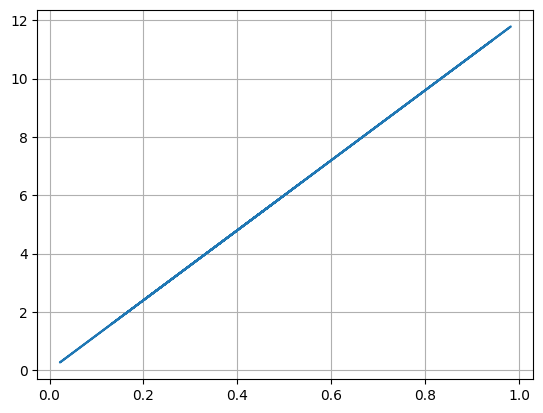

In [ ]:
# require_grad 기능을 켠 tensor는 일반적인 numpy 객체를 얻거나 matplotflib에서 사용할 수 없으나 detach를 사용하면 가능.
a_detach = a.detach().numpy() # a와 여전히 underlying memory를 공유.
d_detach = d.detach().numpy() # b와 여전히 underlying memory를 공유.

fig, axis = plt.subplots(1,1)
axis.plot(a_detach,d_detach)
axis.grid()
# axis.set_xlim(a_detach.min(),a_detach.max())
# axis.set_ylim(d_detach.min(),d_detach.max())

In [ ]:
c_detach[0] = 100
print(c) # c도 변경됨.

# underlying memory같음을 확인.
print(c.data_ptr())
print(c.detach().data_ptr())


tensor([100.0000,   5.8931,   1.2404,   1.1902,   5.6497,   1.0134,   0.8002,
          3.2194,   0.1328,   2.2997,   2.9492,   2.2205],
       grad_fn=<MulBackward0>)
97289613601920
97289613601920


In [ ]:
for cur in [a,b,c,d]:
  print(get_tensor_info(cur))
  print('------------------')

requires_grad(True) is_leaf(True) retains_grad(False) grad_fn(None) grad(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])) 
tensortensor([0.1626, 0.9822, 0.2067, 0.1984, 0.9416, 0.1689, 0.1334, 0.5366, 0.0221,
        0.3833, 0.4915, 0.3701], requires_grad=True)
------------------
requires_grad(True) is_leaf(False) retains_grad(True) grad_fn(<MulBackward0 object at 0x7800cad46830>) grad(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])) 
tensortensor([0.3253, 1.9644, 0.4135, 0.3967, 1.8832, 0.3378, 0.2667, 1.0731, 0.0443,
        0.7666, 0.9831, 0.7402], grad_fn=<MulBackward0>)
------------------
requires_grad(True) is_leaf(False) retains_grad(True) grad_fn(<MulBackward0 object at 0x7800c8c08070>) grad(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])) 
tensortensor([100.0000,   5.8931,   1.2404,   1.1902,   5.6497,   1.0134,   0.8002,
          3.2194,   0.1328,   2.2997,   2.9492,   2.2205],
       grad_fn=<MulBackward0>)
------------------
requires_grad(True) i

# Find maximum and minimum from tensor

In [ ]:
rng = np.random.default_rng(seed=23)
ori = rng.random((3,2)).astype(np.float32)
print(ori)

a_np = ori.copy()
a_torch = torch.tensor(ori)
a_tf = tf.Variable(ori)

[[0.69393307 0.6414582 ]
 [0.12864423 0.11370805]
 [0.6533455  0.8534571 ]]


## NumPy
- np.max 와 np.min 함수를 이용하여 최대, 최소인 값을 구함.
- 특정 축을 axis parameter로 지정하여 구할 수 있음 (결과는 해당 axis가 1이 됨.)
- np.argmax 와 np.argmin 함수를 이용하여 최대, 최소인 값의 index를 반환함.

In [ ]:
print("max")
print(np.max(a_np)) # 전체
print(np.max(a_np, 0)) # row
print(np.max(a_np, 1)) # column

print("\nmin")
print(np.min(a_np)) # 전체
print(np.min(a_np, 0)) # row
print(np.min(a_np, 1)) # column

print("\nargmax")
print(np.argmax(a_np)) # 전체
print(np.argmax(a_np, 0)) # row
print(np.argmax(a_np, 1)) # column

print("\nargmin")
print(np.argmin(a_np)) # 전체
print(np.argmin(a_np, 0)) # row
print(np.argmin(a_np, 1)) # column

max
0.8534571
[0.69393307 0.8534571 ]
[0.69393307 0.12864423 0.8534571 ]

min
0.11370805
[0.12864423 0.11370805]
[0.6414582  0.11370805 0.6533455 ]

argmax
5
[0 2]
[0 0 1]

argmin
3
[1 1]
[1 1 0]


## PyTorch

`torch.max`와 `torch.min` 함수를 사용하여 최대값과 최소값을 구함.

- 특정 축을 `dim` parameter로 지정하여 구할 수 있음.
- 특정 축을 지정할 경우, `torch.max`와 `torch.min`은 indices를 같이 반환함.
- `torch.argmax` 와 `torch.argmin` 함수를 이용하여 최대, 최소값의 indices를 반환함.

In [ ]:
print("max")
print(torch.max(a_torch)) # 축을 지정하지 않으면 값만 반환
print(torch.max(a_torch, 0)) # row
print(torch.max(a_torch, 1)) # column

print("\nmin")
print(torch.min(a_torch)) # 축을 지정하지 않으면 값만 반환
print(torch.min(a_torch, 0)) # row
print(torch.min(a_torch, 1)) # column

print("\nargmax")
print(torch.argmax(a_torch)) # 축을 지정하지 않으면 값만 반환
print(torch.argmax(a_torch, 0)) # row
print(torch.argmax(a_torch, 1)) # column

print("\nargmin")
print(torch.argmin(a_torch)) # 축을 지정하지 않으면 값만 반환
print(torch.argmin(a_torch, 0)) # row
print(torch.argmin(a_torch, 1)) # column

max
tensor(0.8535)
torch.return_types.max(
values=tensor([0.6939, 0.8535]),
indices=tensor([0, 2]))
torch.return_types.max(
values=tensor([0.6939, 0.1286, 0.8535]),
indices=tensor([0, 0, 1]))

min
tensor(0.1137)
torch.return_types.min(
values=tensor([0.1286, 0.1137]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([0.6415, 0.1137, 0.6533]),
indices=tensor([1, 1, 0]))

argmax
tensor(5)
tensor([0, 2])
tensor([0, 0, 1])

argmin
tensor(3)
tensor([1, 1])
tensor([1, 1, 0])


## TensorFlow

`tf.reduce_max`와 `tf.reduce_min` 함수를 사용하여 최대값과 최소값을 구함.

- 특정 축을 따라 구할 경우엔, `axis` parameter로 지정.
- torch.argmax 와 torch.argmin 함수를 이용하여 최대, 최소값의 indices를 반환함.

In [ ]:
print("max")
print(tf.reduce_max(a_tf)) # 전체
print(tf.reduce_max(a_tf, 0))
print(tf.reduce_max(a_tf, 1))

print("\nmin")
print(tf.reduce_min(a_tf))
print(tf.reduce_min(a_tf, 0))
print(tf.reduce_min(a_tf, 1))

print("\nargmax")
print(tf.argmax(a_tf))
print(tf.argmax(a_tf, 0))
print(tf.argmax(a_tf, 1))

print("\nargmin")
print(tf.argmin(a_tf))
print(tf.argmin(a_tf, 0))
print(tf.argmin(a_tf, 1))

max
tf.Tensor(0.8534571, shape=(), dtype=float32)
tf.Tensor([0.69393307 0.8534571 ], shape=(2,), dtype=float32)
tf.Tensor([0.69393307 0.12864423 0.8534571 ], shape=(3,), dtype=float32)

min
tf.Tensor(0.11370805, shape=(), dtype=float32)
tf.Tensor([0.12864423 0.11370805], shape=(2,), dtype=float32)
tf.Tensor([0.6414582  0.11370805 0.6533455 ], shape=(3,), dtype=float32)

argmax
tf.Tensor([0 2], shape=(2,), dtype=int64)
tf.Tensor([0 2], shape=(2,), dtype=int64)
tf.Tensor([0 0 1], shape=(3,), dtype=int64)

argmin
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor([1 1], shape=(2,), dtype=int64)
tf.Tensor([1 1 0], shape=(3,), dtype=int64)


In [ ]:
a_np = rng.random((2,2,3)).astype(np.float32)
a_np

array([[[0.20177913, 0.21801864, 0.7165846 ],
        [0.47069967, 0.41522193, 0.3491478 ]],

       [[0.06385376, 0.45466617, 0.3014533 ],
        [0.38907674, 0.5402978 , 0.6835897 ]]], dtype=float32)

In [ ]:
a = torch.tensor(a_np)
m = torch.max(a,2)
print(m[0].shape)
print(m[1].shape)
m

torch.Size([2, 2])
torch.Size([2, 2])


torch.return_types.max(
values=tensor([[0.7166, 0.4707],
        [0.4547, 0.6836]]),
indices=tensor([[2, 0],
        [1, 2]]))

In [ ]:
m = torch.max(a,1)
print(m[0].shape, m[1].shape)
m

torch.Size([2, 3]) torch.Size([2, 3])


torch.return_types.max(
values=tensor([[0.4707, 0.4152, 0.7166],
        [0.3891, 0.5403, 0.6836]]),
indices=tensor([[1, 1, 0],
        [1, 1, 1]]))

In [ ]:
a_p = torch.permute(a, [0,2,1])
a_p

tensor([[[0.2018, 0.4707],
         [0.2180, 0.4152],
         [0.7166, 0.3491]],

        [[0.0639, 0.3891],
         [0.4547, 0.5403],
         [0.3015, 0.6836]]])